In [1]:
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric, TotalSwaps
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [2]:
# N = 4
# coupling_map = CouplingMap.from_line(N)
coupling_map = CouplingMap.from_heavy_hex(5)

In [3]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("../../circuits/debug.txt")

In [4]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually

# NOTE: use TotalSwaps to verify baselines have > 0 swaps
# otherwise, there is no room for improvement.
# we can include these if we want to show our methods will still work
# but somewhat trivial since we just append VF2Layout
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    # QiskitLevel3(coupling_map, cx_basis=True),
    # Mirage(coupling_map, cx_basis=True, parallel=0),
    QiskitLevel3(coupling_map),
    Mirage(coupling_map, logger=transpile_benchy_logger),
]

In [5]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


Circuits from library:   0%|          | 0/13 [00:00<?, ?it/s]

Loading qec9xz_n17 from QASMBench


INFO:transpile_benchy:Running benchmark for circuit qec9xz_n17
Circuits from library:   8%|▊         | 1/13 [02:07<25:28, 127.41s/it]INFO:transpile_benchy:Running benchmark for circuit seca_n11


Loading seca_n11 from QASMBench


Circuits from library:  15%|█▌        | 2/13 [04:43<26:28, 144.39s/it]INFO:transpile_benchy:Running benchmark for circuit qram_n20


Loading qram_n20 from QASMBench


Circuits from library:  23%|██▎       | 3/13 [07:44<26:48, 160.88s/it]INFO:transpile_benchy:Running benchmark for circuit knn_n25


Loading knn_n25 from QASMBench


Circuits from library:  31%|███       | 4/13 [10:33<24:37, 164.16s/it]INFO:transpile_benchy:Running benchmark for circuit swap_test_n25


Loading swap_test_n25 from QASMBench


Circuits from library:  38%|███▊      | 5/13 [13:22<22:07, 165.96s/it]INFO:transpile_benchy:Running benchmark for circuit bigadder_n18


Loading bigadder_n18 from QASMBench


Circuits from library:  46%|████▌     | 6/13 [16:53<21:08, 181.23s/it]INFO:transpile_benchy:Running benchmark for circuit multiplier_n15


Loading multiplier_n15 from QASMBench


Circuits from library:  54%|█████▍    | 7/13 [22:15<22:44, 227.44s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n18


Loading qft_n18 from QASMBench


Circuits from library:  62%|██████▏   | 8/13 [27:43<21:36, 259.24s/it]INFO:transpile_benchy:Running benchmark for circuit sat_n11


Loading sat_n11 from QASMBench


Circuits from library:  69%|██████▉   | 9/13 [32:53<18:20, 275.08s/it]

Loading portfolioqaoa_n16 from MQTBench


INFO:transpile_benchy:Running benchmark for circuit portfolioqaoa_n16
Circuits from library:  77%|███████▋  | 10/13 [47:00<22:35, 451.72s/it]INFO:transpile_benchy:Running benchmark for circuit qftentangled_n16


Loading qftentangled_n16 from MQTBench


Circuits from library:  85%|████████▍ | 11/13 [53:19<14:18, 429.35s/it]INFO:transpile_benchy:Running benchmark for circuit qpeexact_n16


Loading qpeexact_n16 from MQTBench


Circuits from library:  92%|█████████▏| 12/13 [59:25<06:50, 410.12s/it]INFO:transpile_benchy:Running benchmark for circuit ae_n16


Loading ae_n16 from MQTBench


Circuits from library: 100%|██████████| 13/13 [1:05:24<00:00, 301.90s/it]


In [10]:
print(benchmark)


Transpiler: Mirage-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: ae_n16                                   Mean result: 0.948                          Trials: [0.907563025210084, 0.8991596638655462, 0.9663865546218487, 1.0, 0.9663865546218487]
  Circuit: bigadder_n18                             Mean result: 0.271                          Trials: [0.1592920353982301, 0.21238938053097345, 0.3008849557522124, 0.3274336283185841, 0.35398230088495575]
  Circuit: knn_n25                                  Mean result: 0.425                          Trials: [0.36619718309859156, 0.323943661971831, 0.5492957746478874, 0.29577464788732394, 0.5915492957746479]
  Circuit: multiplier_n15                           Mean result: 0.393                          Trials: [0.3553299492385787, 0.41116751269035534, 0.4873096446700508, 0.3604060913705584, 0.350253807106599]
  Circuit: portfolioqaoa_n16                        Mean result: 0.987                          Trials: [0.9442896935933147,

In [11]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -31.18925974200507,
  'aggregrate_change': -33.40650586991774,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'knn_n25'},
 'monodromy_total': {'average_change': -16.96877185481387,
  'aggregrate_change': -22.35381939803622,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'qram_n20'},
 'total_swaps': {'average_change': -56.189143303765505,
  'aggregrate_change': -75.8151733091156,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'qram_n20'},
 'accepted_subs': {'average_change': inf,
  'aggregrate_change': inf,
  'best_circuit': 'qec9xz_n17',
  'worst_circuit': 'qec9xz_n17'},
 'total_runtime': {'average_change': 13306.223460699812,
  'aggregrate_change': 10948.775733072283,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'qec9xz_n17'}}

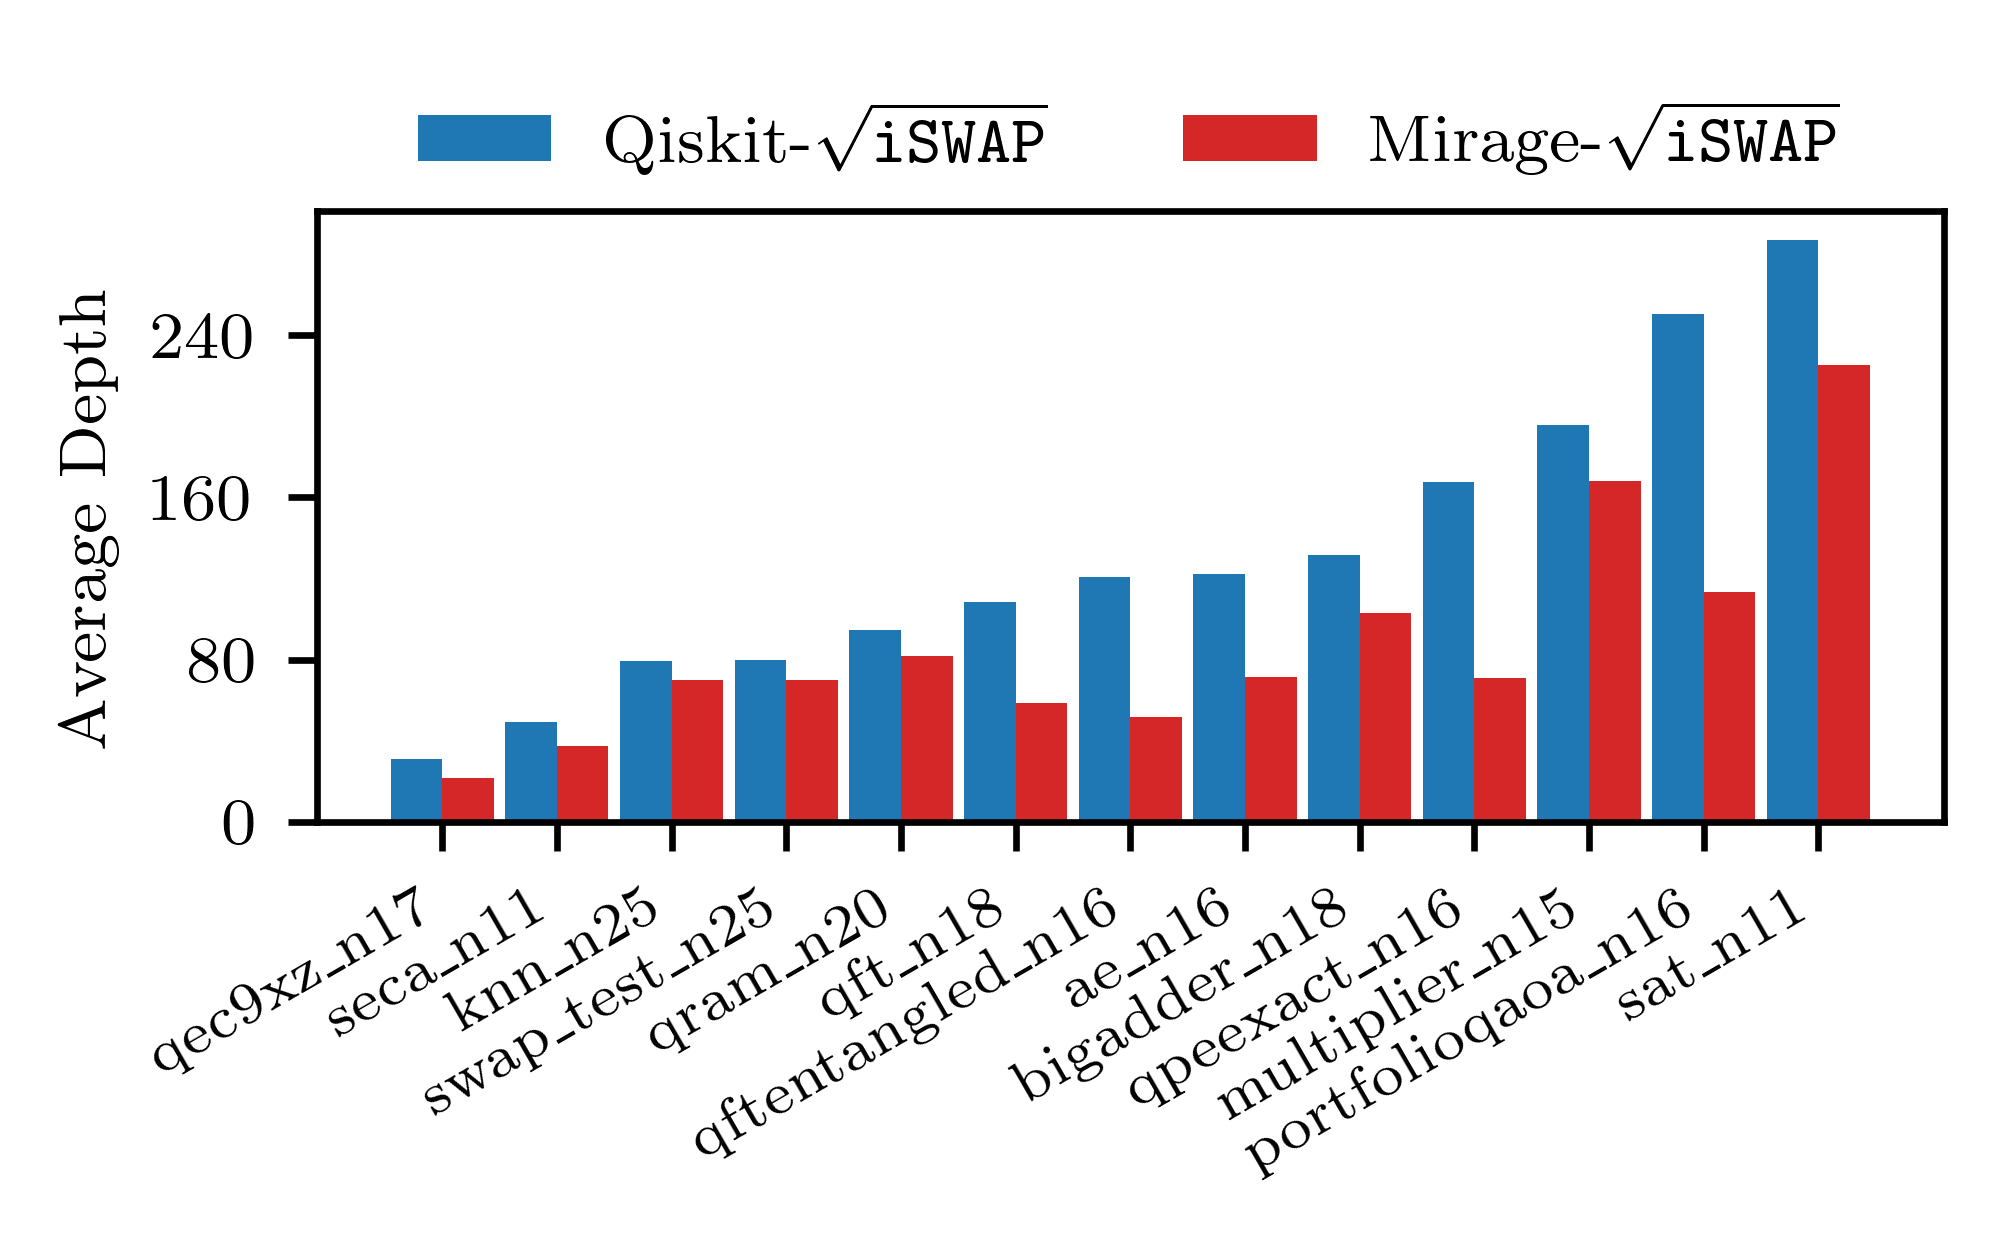

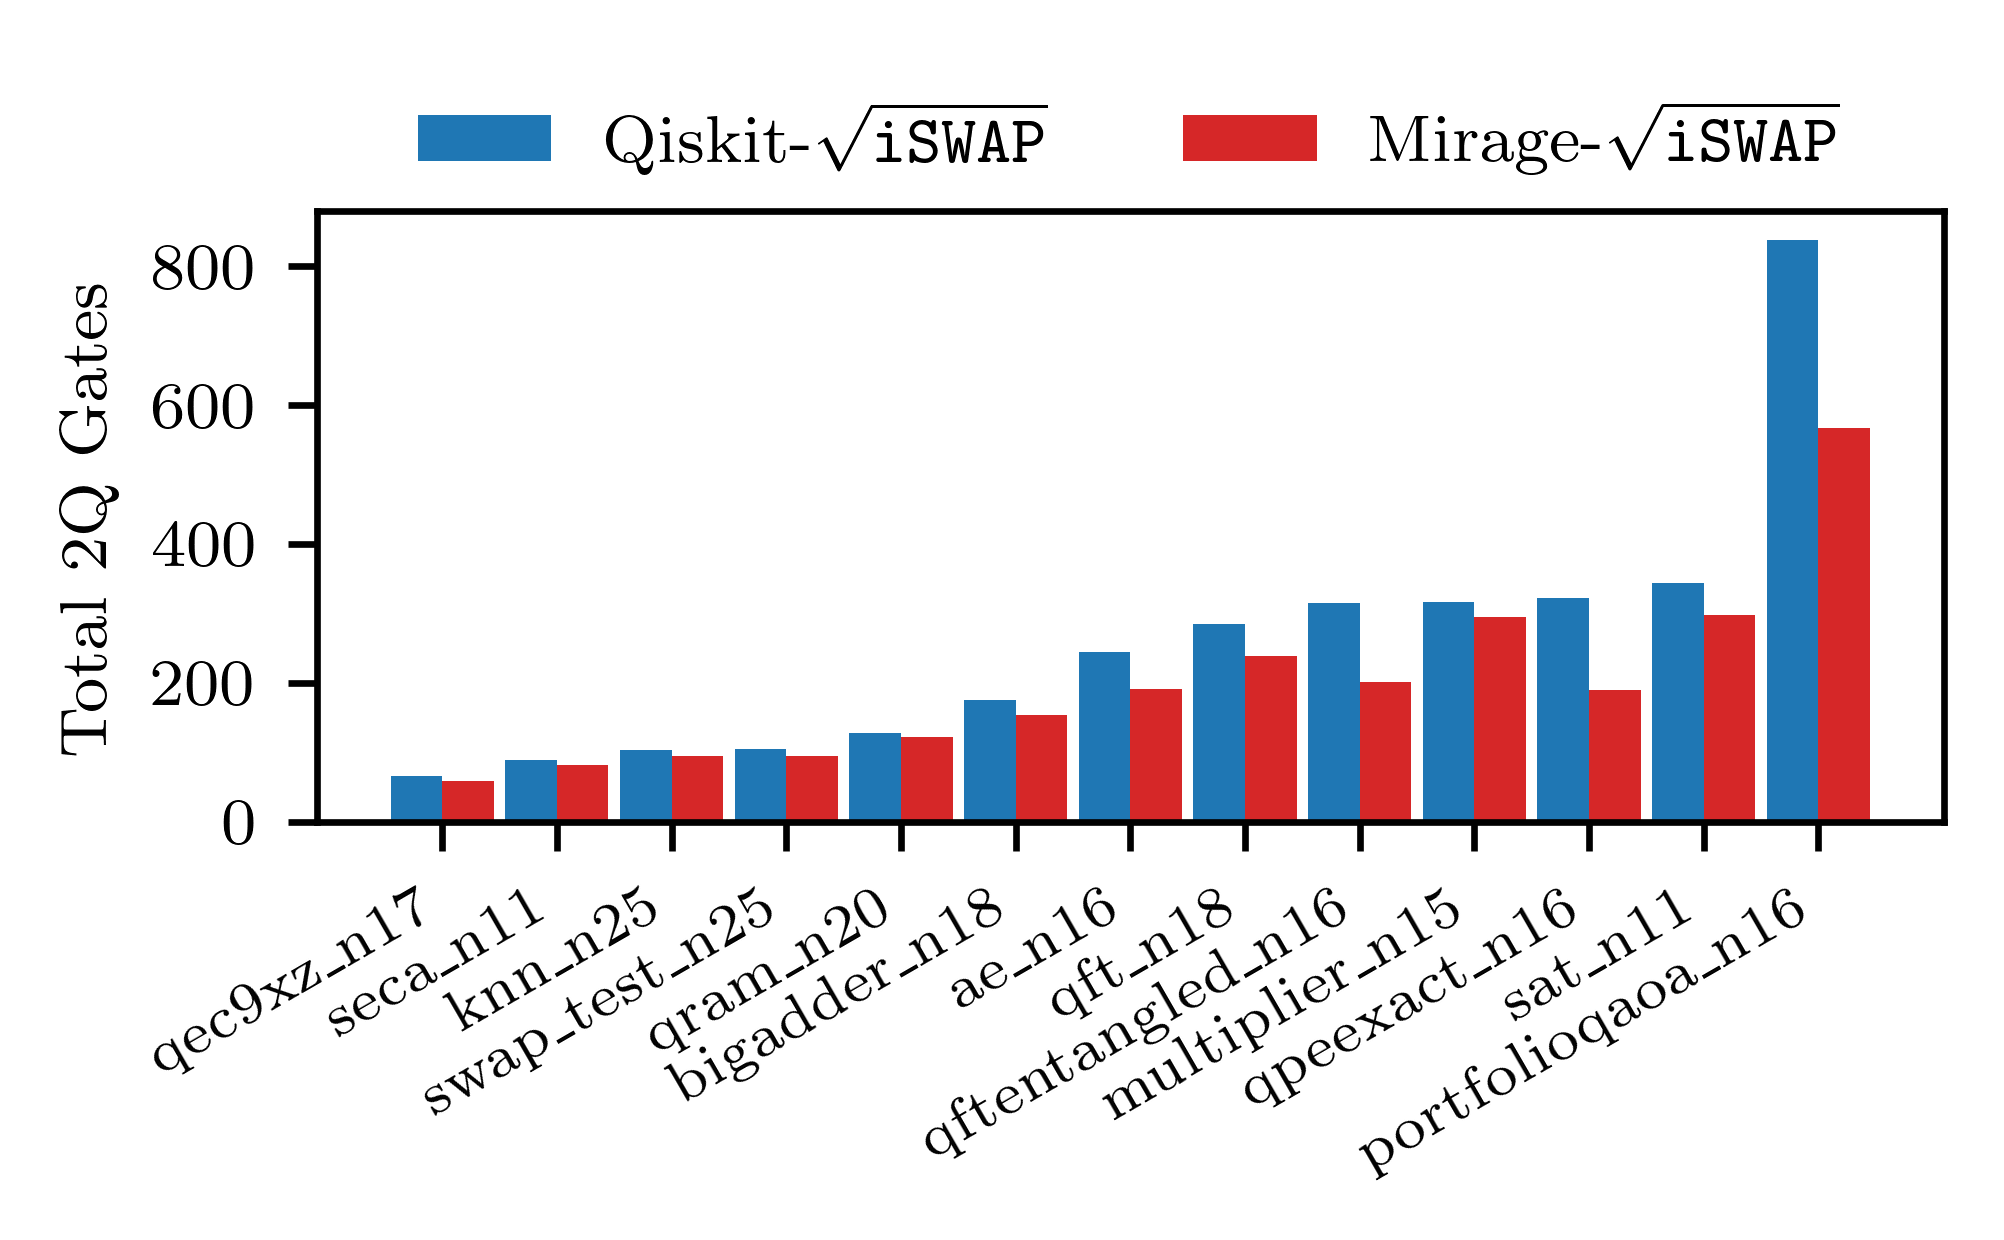

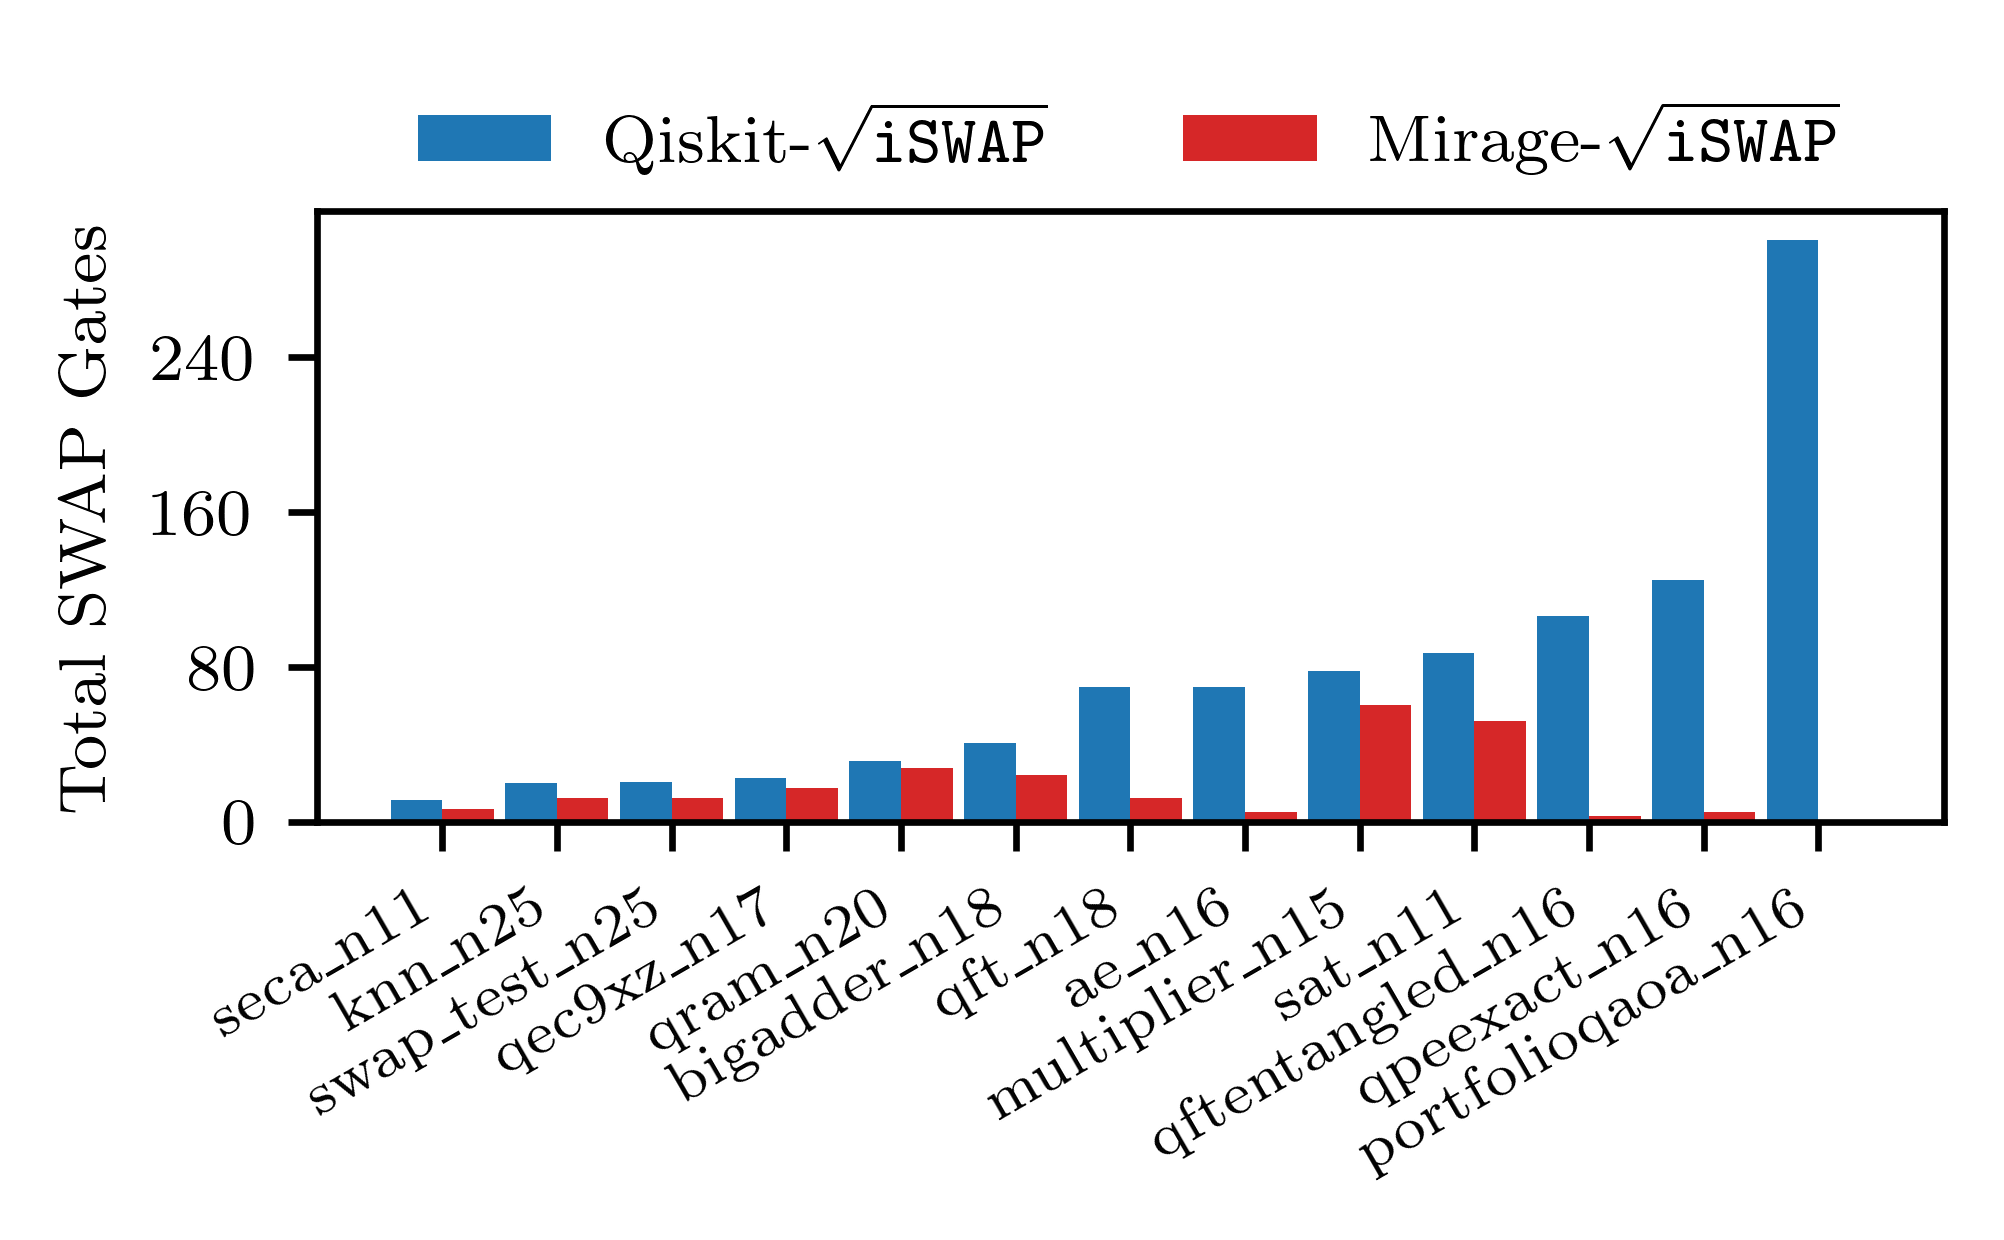

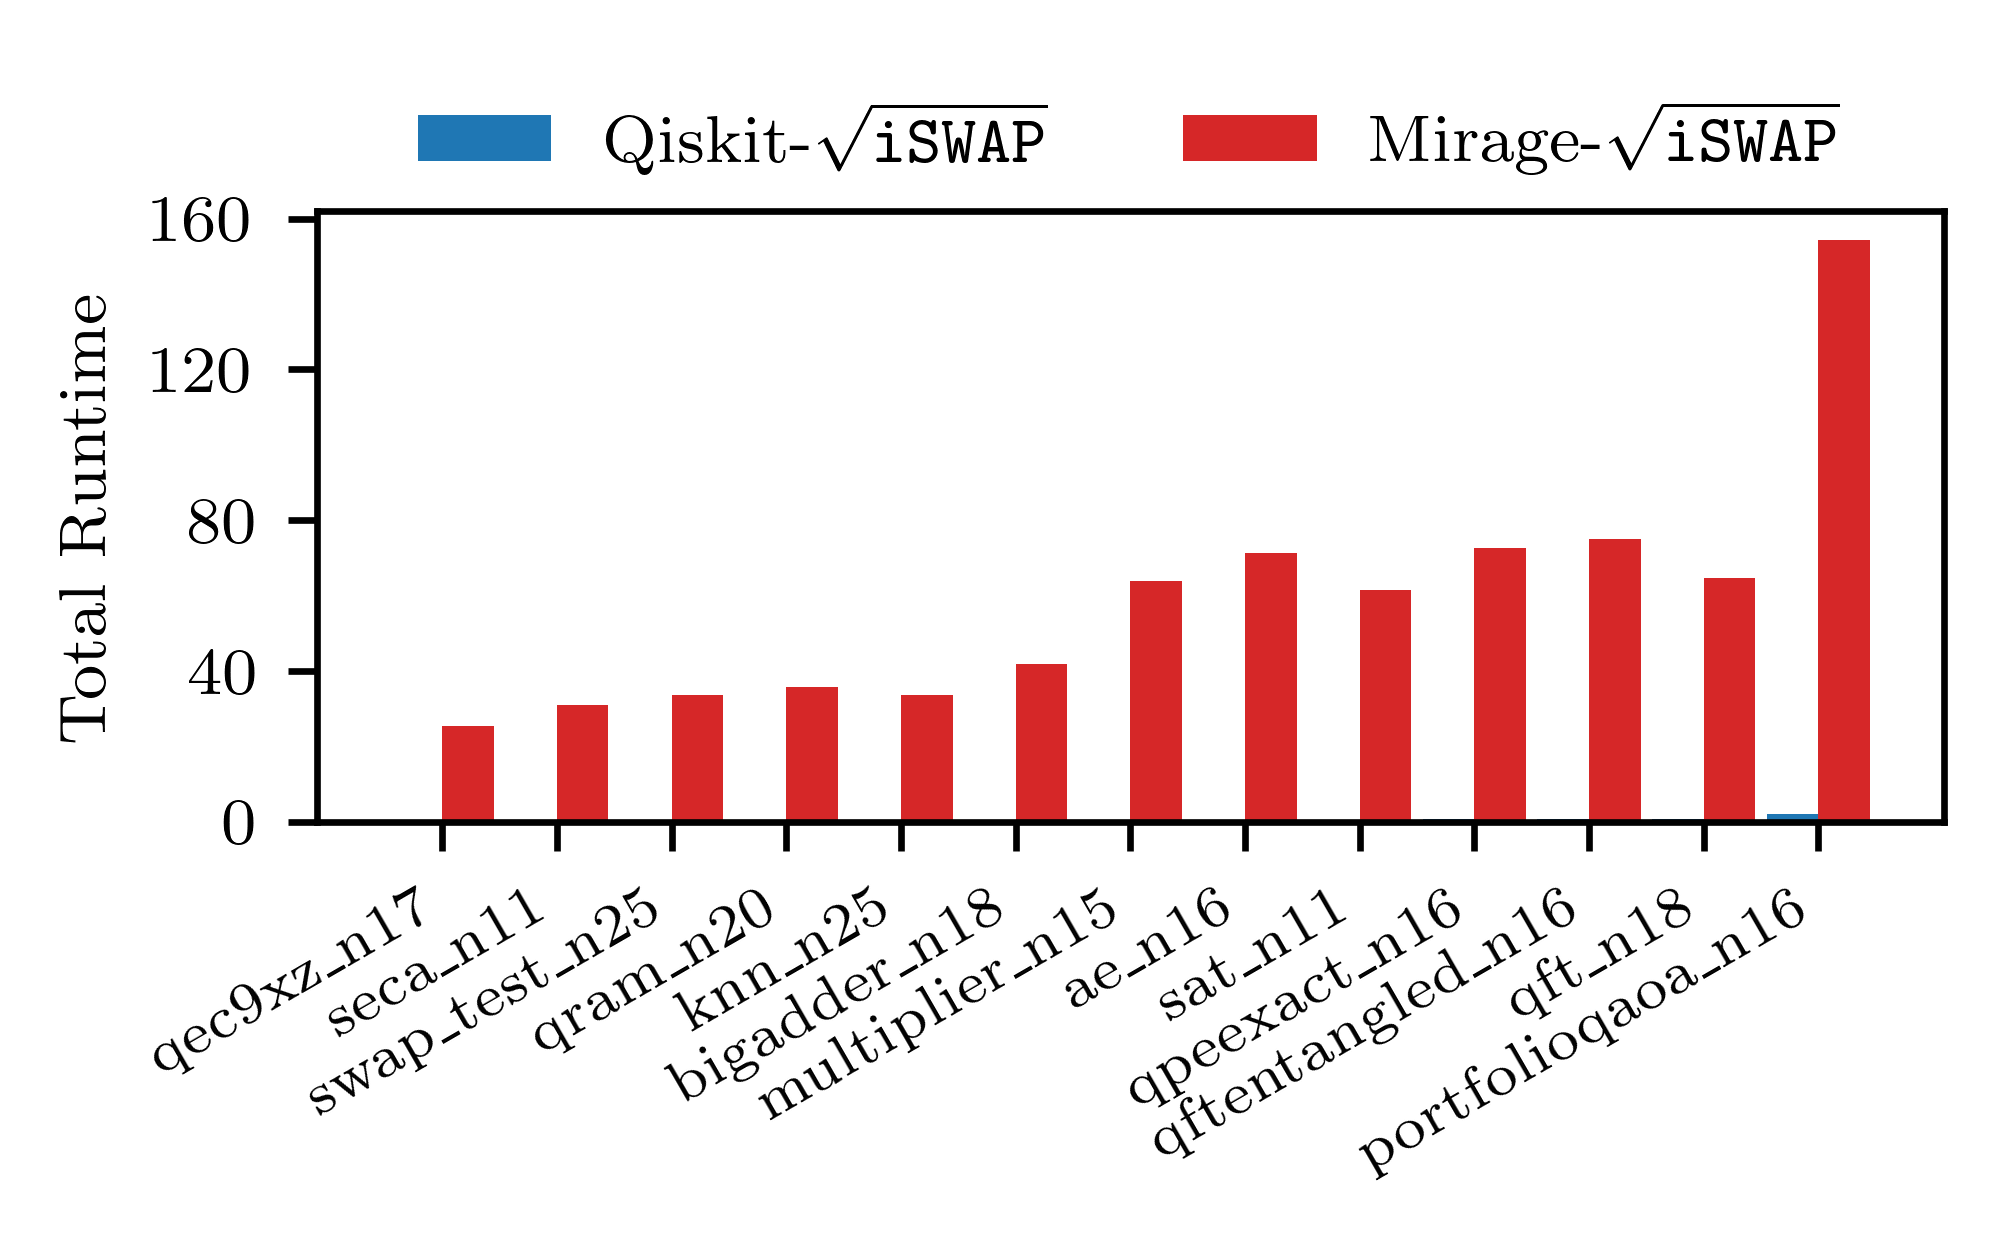

In [21]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="hex", color_override=[0, 3])